In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import json

Populating the interactive namespace from numpy and matplotlib


In [3]:
#read citibike dataset from January 2015
df = pd.read_csv('201501-citibike-tripdata.csv')

In [7]:
df['ageL'] = 2015 - df['birth year'][(df['usertype']=='Subscriber') & (df['tripduration']>=3000)]
df['ageS'] = 2015 - df['birth year'][(df['usertype']=='Subscriber') & (df['tripduration']<3000)]

#df.head
#pd.unique(df.usertype)

array(['Subscriber', 'Customer'], dtype=object)

KS 0.0569347918508


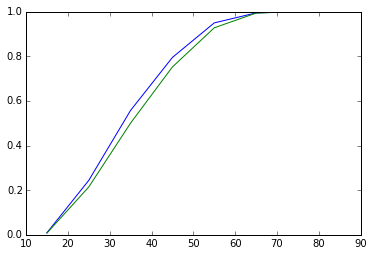

In [21]:
#bin by age
bins = np.arange(0,99,10)

#aggregate of ages
ag1 = df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero])
ag2 = df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero])
#ag1.plot(kind = 'bar')
#ag2.plot(kind = 'bar')

#cumulative sums in each age group
cs1 = df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero]).cumsum()
cs2 = df.ageL.groupby(pd.cut(df.ageL, bins)).agg([count_nonzero]).cumsum()
#cs1.plot(kind = 'bar')
#cs2.plot(kind = 'bar')

#printdf.ageS
#print pd.cut(df['ageS'],bins)
#print df.ageS.groupby(pd.cut(df.ageS, bins)).first()
#print df.ageS.groupby(pd.cut(df.ageS,bins)).agg([count_nonzero]) #number of people that fall into bins
#print df.ageS.groupby(pd.cut(df.ageS,bins)).agg([count_nonzero]).cumsum()

pl.plot(bins[:-1]+5, cs1/cs1.max()) #+5 makes everything fall in the center of the bin
pl.plot(bins[:-1]+5, cs2/cs2.max())
#seeing if the people are distributed the same way
KS = np.nanmax(np.array(cs1/cs1.max())- np.array(cs2/cs2.max()))
print "KS", KS